In [155]:
import json

# load in continuous time series data

ax_u1, ay_u1, az_u1, time_millis_u1, total_u1 = [], [], [], [], []

u1_dir = "testData/newGaitsO/"

for fileno in range(1, 11):
    with open(f'{u1_dir}{fileno}/ax_array{fileno}.txt') as f:
        ax_u1.extend(json.load(f))
    with open(f'{u1_dir}{fileno}/ay_array{fileno}.txt') as f:
        ay_u1.extend(json.load(f))
    with open(f'{u1_dir}{fileno}/az_array{fileno}.txt') as f:
        az_u1.extend(json.load(f))
#     with open(f'{u1_dir}{fileno}/total_array{fileno}.txt') as f:
#         total_u1.extend(json.load(f))
#     with open(f'{u1_dir}{fileno}/time_array{fileno}.txt') as f:
#         # time is measured in 50ths of a second
#         time_millis_u1.extend([ x*20 for x in json.load(f) ])

time_millis_u1 = [ i*20 for i in range(0, len(ax_u1)) ]



ax_u2, ay_u2, az_u2, time_millis_u2, total_u2 = [], [], [], [], []
u2_fileno = 2
u2_dir = 'testData/newGaitsH/'
for fileno in range(1, 10):
    with open(f'{u2_dir}{fileno}/ax_array{fileno}.txt') as f:
        ax_u2.extend(json.load(f))
    with open(f'{u2_dir}{fileno}/ay_array{fileno}.txt') as f:
        ay_u2.extend(json.load(f))
    with open(f'{u2_dir}{fileno}/az_array{fileno}.txt') as f:
        az_u2.extend(json.load(f))
    with open(f'{u2_dir}{fileno}/total_array{fileno}.txt') as f:
        total_u2.extend(json.load(f))
#     with open(f'{u1_dir}{fileno}/time_array{fileno}.txt') as f:
#         # time is measured in 50ths of a second
#         time_millis_u1.extend([ x*20 for x in json.load(f) ])
    
time_millis_u2 = [ i*20 for i in range(0, len(ax_u2)) ]

assert(len(ax_u1) == len(ay_u1) and len(ay_u1) == len(az_u1) and len(az_u1) == len(time_millis_u1))
assert(len(ax_u2) == len(ay_u2) and len(ay_u2) == len(az_u2) and len(az_u2) == len(time_millis_u2)
       and len(time_millis_u2) == len(total_u2))

print(f"len(a?_u1) = {len(ax_u1)}")
print(f"len(a?_u2) = {len(ax_u2)}")

# time_scale is the no. of milliseconds between readings
time_scale = 20

len(a?_u1) = 4619
len(a?_u2) = 6763


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from sklearn.preprocessing import normalize

In [157]:
b, a = butter(4, [2, 20], 'bandpass', fs=50)

def bandfilter(ax, ay, az):
    b, a = butter(3, [0.25, 20], 'bandpass', fs=50)
    ax_f, ay_f, az_f = lfilter(b, a, ax) , lfilter(b, a, ay), lfilter(b, a, az)
    return ax_f, ay_f, az_f

ax_u1_f, ay_u1_f, az_u1_f = bandfilter(ax_u1, ay_u1, az_u1)
ax_u2_f, ay_u2_f, az_u2_f = bandfilter(ax_u2, ay_u2, az_u2)

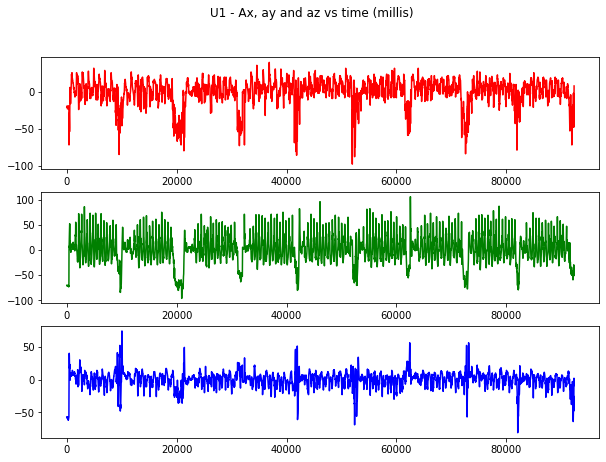

In [162]:


def plot_data(ax, ay, az, time_millis, title='Ax, ay and az'):
    fig, axs = plt.subplots(3, figsize=(10,7))
    fig.suptitle(title)
    axs[0].plot(time_millis, ax, color="red")
    axs[1].plot(time_millis, ay, color="green")
    axs[2].plot(time_millis, az, color="blue")
    plt.show()

plot_data(ax_u1_f, ay_u1_f, az_u1_f, time_millis_u1, title='U1 - Ax, ay and az vs time (millis)')

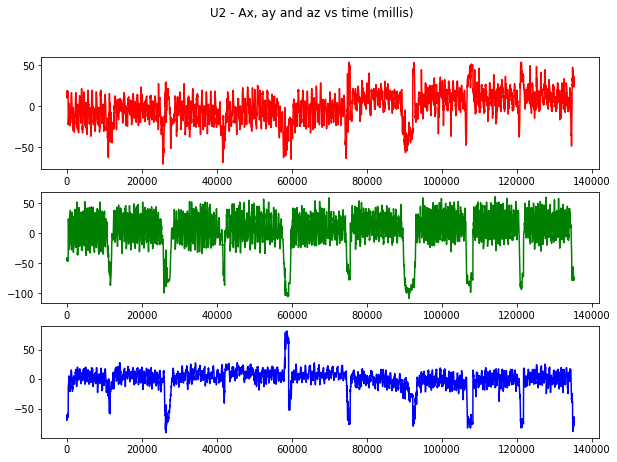

In [163]:
plot_data(ax_u2_f, ay_u2_f, az_u2_f, time_millis_u2,title='U2 - Ax, ay and az vs time (millis)')

In [164]:

# we get abt 4% better accuracy by giving each axis a mean of 0
def transform(ax, ay, az):
    ax = ax - np.mean(ax)
    ay = ay - np.mean(ay)
    az = az - np.mean(az)
    return ax, ay, az

ax_u1_f, ay_u1_f, az_u1_f = transform(ax_u1, ay_u1, az_u1)
ax_u2_f, ay_u2_f, az_u2_f = transform(ax_u2, ay_u2, az_u2)

In [199]:
# step 1 - peak finding on the z-axis


def get_peaks(az, time_scale, time_millis, distance=600):

    az_mean = np.mean(az)
    peaks,_ = find_peaks(az, distance= distance/time_scale, height = az_mean + 10)
    plt.plot(time_millis, az, color="green", markevery=peaks, marker="o", label="points")
    plt.title("Az - peak finding")
    plt.rcParams["figure.figsize"] = (10, 3)
    print(f"peaks indices = {peaks}")
    print(f"peaks values = { [ round(az[peak],2) for peak in peaks ]}")
    return peaks
    

peaks indices = [  26   78  108  160  212  262  312  363  420  508  576  615  669  725
  781  811  864  920  956 1073 1165 1224 1279 1309 1361 1415 1445 1497
 1527 1616 1668 1698 1749 1779 1831 1861 1915 1968 2023 2054 2118 2161
 2223 2256 2305 2336 2387 2444 2474 2530 2560 2597 2659 2701 2759 2813
 2869 2902 2951 3002 3057 3128 3193 3228 3258 3311 3366 3422 3479 3512
 3565 3665 3724 3778 3834 3884 3935 3994 4051 4084 4131 4184 4244 4300
 4358 4411 4466 4519 4550]
peaks values = [52.59, 30.59, 72.59, 86.59, 73.59, 73.59, 72.59, 54.59, 59.59, 45.59, 25.59, 39.59, 60.59, 68.59, 57.59, 61.59, 75.59, 55.59, 24.59, 39.59, 40.59, 71.59, 40.59, 66.59, 60.59, 56.59, 39.59, 49.59, 55.59, 71.59, 42.59, 47.59, 70.59, 68.59, 33.59, 71.59, 71.59, 75.59, 63.59, 69.59, 82.59, 37.59, 71.59, 25.59, 96.59, 26.59, 54.59, 69.59, 65.59, 51.59, 65.59, 19.59, 41.59, 46.59, 82.59, 63.59, 70.59, 36.59, 76.59, 66.59, 50.59, 106.59, 44.59, 48.59, 69.59, 73.59, 66.59, 57.59, 67.59, 20.59, 73.59, 35.59, 62.59, 70.

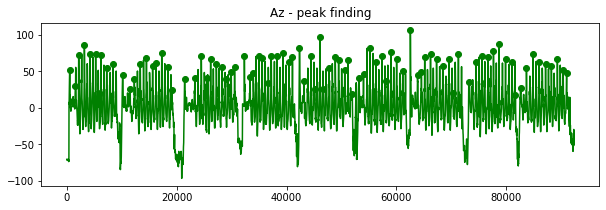

In [200]:
peaks_u1 = get_peaks(ay_u1_f, time_scale, time_millis_u1, distance=600)

peaks indices = [  47   79  134  186  238  273  328  406  442  472  502  532  625  658
  690  726  784  835  894  952 1011 1042 1077 1130 1189 1220 1251 1433
 1490 1523 1557 1604 1636 1671 1722 1752 1782 1844 1910 1961 1995 2031
 2134 2165 2206 2241 2273 2305 2361 2399 2429 2462 2492 2533 2567 2623
 2658 2690 2725 2757 2789 2822 2859 3014 3069 3099 3131 3163 3196 3249
 3280 3310 3340 3370 3402 3462 3492 3524 3556 3586 3628 3682 3713 3805
 3840 3896 3928 3990 4024 4057 4087 4142 4173 4203 4234 4264 4299 4355
 4386 4418 4451 4656 4714 4745 4800 4836 4882 4936 4993 5049 5106 5162
 5218 5248 5307 5424 5483 5516 5548 5595 5651 5681 5712 5760 5814 5868
 5898 5932 5984 6015 6106 6164 6222 6278 6312 6357 6389 6444 6500 6555
 6612 6672 6710]
peaks values = [38.27, 28.27, 52.27, 35.27, 53.27, 42.27, 44.27, 41.27, 52.27, 37.27, 37.27, 19.27, 27.27, 38.27, 47.27, 39.27, 46.27, 46.27, 49.27, 48.27, 52.27, 43.27, 41.27, 44.27, 44.27, 35.27, 24.27, 40.27, 40.27, 39.27, 33.27, 32.27, 53.27, 40.27, 44.

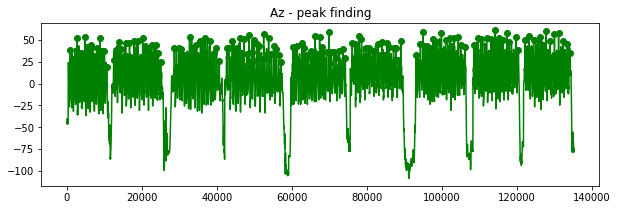

In [201]:
peaks_u2 = get_peaks(ay_u2_f, time_scale, time_millis_u2, distance=600)

In [202]:
# step 2 - create sliding windows centred around the peak

# total no. of readings to take
def generate_windows(ax, ay, az, time_scale, time_millis, peaks, num_readings=40):
    print(f"window time = {num_readings * time_scale}ms")
    # windows store the az readings for various windows
    windows = []
    window_times = []
    for peak in peaks:
        window, window_time = [], []
        # include half of the readings on either side of the peak
        lower = int(peak - num_readings/2)
        upper = int(peak + num_readings/2)
        # skip windows that are out of bounds
        if lower < 0 or upper >= len(ax):
            print(f"peak {az[peak]} at t={time_millis[peak]} has an out of bounds window")
            continue
        # each window is of the format [ ax0, ay0, az0, ax1, ay1, az1, ... , axn, ayn, azn ]
        # consisting of n readings centred around the strike point in the z-axis
        for i in range(lower, upper):
            curr = [ round(ax[i], 3), round(ay[i], 3), round(az[i], 3) ]
            window.extend(curr)
            window_time.append(time_millis[i])
            
        windows.append(window)
        window_times.append(window_time)
    return windows, window_times

def squashed_windows(ax, ay, az, time_scale, time_millis, peaks, num_readings=40):
    print(f"window time = {num_readings * time_scale}ms")
    # windows store the az readings for various windows
    windows = []
    window_times = []
    for peak in peaks:
        window, window_time = [], []
        # include half of the readings on either side of the peak
        lower = int(peak - num_readings/2)
        upper = int(peak + num_readings/2)
        # skip windows that are out of bounds
        if lower < 0 or upper >= len(ax):
            print(f"peak {az[peak]} at t={time_millis[peak]} has an out of bounds window")
            continue
        # each window is of the format [ ax0, ay0, az0, ax1, ay1, az1, ... , axn, ayn, azn ]
        # consisting of n readings centred around the strike point in the z-axis
        ax_sliced = ax[lower:upper]
        ay_sliced = ay[lower:upper]
        az_sliced = az[lower:upper]
        time_sliced = time_millis[lower:upper]
        instance =  [ np.mean(ax_sliced), np.mean(ay_sliced), np.mean(az_sliced),
                        np.median(ax_sliced), np.median(ay_sliced), np.median(az_sliced) ]
        windows.append(instance)
        window_times.append(time_sliced)
    return windows, window_times

windows_u1, _ = generate_windows(ax_u1_f, ay_u1_f, az_u1_f, time_scale, time_millis_u1, peaks_u1, num_readings=20)
windows_u2, _ = generate_windows(ax_u2_f, ay_u2_f, az_u2_f, time_scale, time_millis_u2, peaks_u2, num_readings=20)

print(f"len(windows_u1)={len(windows_u1)}")
print(f"len(windows_u2)={len(windows_u2)}")

window time = 400ms
window time = 400ms
len(windows_u1)=89
len(windows_u2)=143


In [203]:
squashed_u1, _ = squashed_windows(ax_u1, ay_u1, az_u1, time_scale, time_millis_u1, peaks_u1, num_readings=20)
squashed_u2, _ = squashed_windows(ax_u2, ay_u2, az_u2, time_scale, time_millis_u2, peaks_u2, num_readings=20)
print(f"len(squashed_u1)={len(squashed_u1)}")
print(f"len(squashed_u2)={len(squashed_u2)}")

window time = 400ms
window time = 400ms
len(squashed_u1)=89
len(squashed_u2)=143


In [204]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def train_and_test(X, y, clf):
    # step 3: split the dataset into training and testing modes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    print(f"len(X_train) = {len(X_train)}")
    print(f"len(X_test) = {len(X_test)}")

    # step 4: train and test a simple SVM classifier
    clf.fit(X_train, y_train)
    print("Training ...")
    plot_confusion_matrix(clf, X_test, y_test)
    plt.title("Classifying U1's gait vs U2's gait")
    plt.show()
    print(f"5-fold cross-val score={np.mean(cross_val_score(clf, X, y, cv=5))}")

len(X_train) = 162
len(X_test) = 70
Training ...


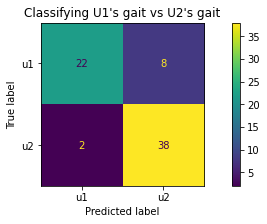

5-fold cross-val score=0.9267345050878817


In [205]:
X = windows_u1 + windows_u2
y = ["u1"] * len(windows_u1) + ["u2"] * len(windows_u2)
# SVM
train_and_test(X, y, svm.SVC())

len(X_train) = 162
len(X_test) = 70
Training ...


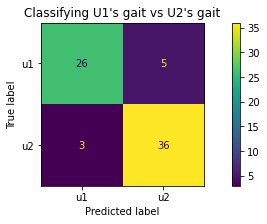

5-fold cross-val score=0.9092506938020352


In [206]:
# kNN
train_and_test(X, y, KNeighborsClassifier(n_neighbors=4))

len(X_train) = 162
len(X_test) = 70
Training ...


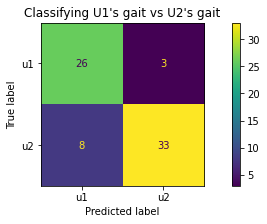

5-fold cross-val score=0.8837187789084181


In [207]:
# logistic regression
train_and_test(X, y, LogisticRegression(max_iter=1000))

len(X_train) = 162
len(X_test) = 70
Training ...


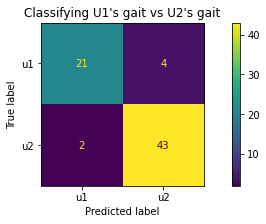

5-fold cross-val score=0.8751156336725254


In [208]:
# random forest classifier
train_and_test(X, y, RandomForestClassifier())

len(X_train) = 162
len(X_test) = 70
Training ...


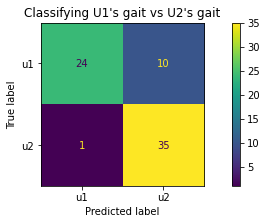

5-fold cross-val score=0.7882516188714153


In [209]:
# repeat steps 3 and 4 for squashed windows
X = squashed_u1 + squashed_u2
y = ["u1"] * len(windows_u1) + ["u2"] * len(windows_u2)
# squashed windows + SVM
train_and_test(X, y, svm.SVC())

len(X_train) = 162
len(X_test) = 70
Training ...


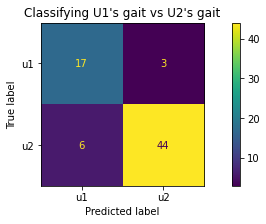

5-fold cross-val score=0.8099907493061979


In [210]:
# squashed windows + KNN
train_and_test(X, y, KNeighborsClassifier(n_neighbors=4))

len(X_train) = 162
len(X_test) = 70
Training ...


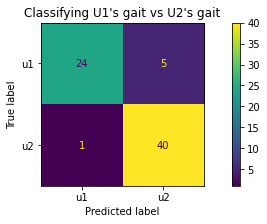

5-fold cross-val score=0.8923219241443109


In [211]:
# squashed windows + logistic regression
train_and_test(X, y, LogisticRegression(max_iter=1000))

len(X_train) = 162
len(X_test) = 70
Training ...


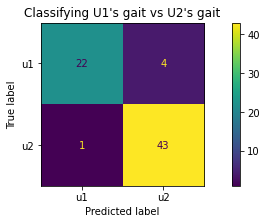

5-fold cross-val score=0.8709528214616096


In [212]:
# squashed windows + random forest classifier
train_and_test(X, y, RandomForestClassifier())